In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pymsm.multi_state_competing_risks_model import PathObject, MultiStateModel
from pymsm.datasets import prep_ebmt_long
from pymsm.plotting import stackplot


%load_ext autoreload
%autoreload 2

In [2]:
competing_risk_dataset, covariate_cols = prep_ebmt_long()
competing_risk_dataset.head()

,sample_id,origin_state,target_state,time_entry_to_origin,time_transition_to_target,match_no gender mismatch,proph_yes,year_1990-1994,year_1995-1998,agecl_<=20,agecl_>40
0,1,1,2,0.0,22.0,1,0,0,1,0,0
1,1,2,0,22.0,995.0,1,0,0,1,0,0
2,2,1,3,0.0,12.0,1,0,0,1,0,0
3,2,3,4,12.0,29.0,1,0,0,1,0,0
4,2,4,5,29.0,422.0,1,0,0,1,0,0


# Peak at some transitions

/home/hagair/anaconda3/envs/pymsm/lib/python3.9/site-packages/lifelines/fitters/aalen_johansen_fitter.py:111: Warning: Tied event times were detected. The Aalen-Johansen estimator cannot handle tied event times.
                To resolve ties, data is randomly jittered.
  warnings.warn(
/home/hagair/anaconda3/envs/pymsm/lib/python3.9/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)


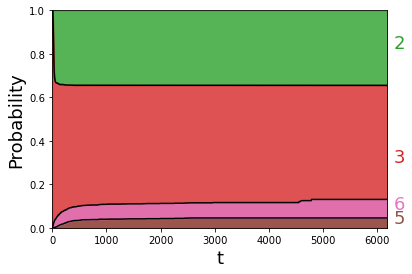

In [3]:
stackplot_data = competing_risk_dataset[competing_risk_dataset["origin_state"]==1]

stackplot(data=stackplot_data, duration_col='time_transition_to_target', event_col='target_state', order_top=[2,3], order_bottom=[5,6])

/home/hagair/anaconda3/envs/pymsm/lib/python3.9/site-packages/lifelines/fitters/__init__.py:204: ApproximationWarning: Approximating using linear interpolation`.

  warnings.warn("Approximating using linear interpolation`.\n", exceptions.ApproximationWarning)


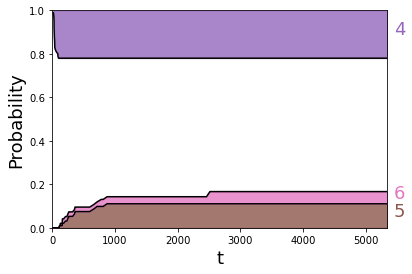

In [4]:
stackplot_data = competing_risk_dataset[competing_risk_dataset["origin_state"]==2].sample(100)

stackplot(data=stackplot_data, duration_col='time_transition_to_target', event_col='target_state', order_top=[4], order_bottom=[5,6])

# Fit MSM

In [6]:
def default_update_covariates_function(
    covariates_entering_origin_state,
    origin_state=None,
    target_state=None,
    time_at_origin=None,
    abs_time_entry_to_target_state=None,
):
    return covariates_entering_origin_state


terminal_states = [5, 6]


multi_state_model = MultiStateModel(
    competing_risk_dataset,
    terminal_states,
    default_update_covariates_function,
    covariate_cols,
    competing_risk_data_format=True,
)


multi_state_model.fit()


Fitting Model at State: 1
>>> Fitting Transition to State: 2, n events: 785
>>> Fitting Transition to State: 3, n events: 907
>>> Fitting Transition to State: 5, n events: 95
>>> Fitting Transition to State: 6, n events: 160
Fitting Model at State: 2
>>> Fitting Transition to State: 5, n events: 112
>>> Fitting Transition to State: 6, n events: 39
>>> Fitting Transition to State: 4, n events: 227
Fitting Model at State: 3
>>> Fitting Transition to State: 4, n events: 433
>>> Fitting Transition to State: 6, n events: 197
>>> Fitting Transition to State: 5, n events: 56
Fitting Model at State: 4
>>> Fitting Transition to State: 5, n events: 107
>>> Fitting Transition to State: 6, n events: 137
